In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import requests

In [5]:
wm_title=[]  
wm_date = []
wm_content = []
wm_rating = []
for i in range(1,150):
    link ="https://www.amazon.in/New-Apple-iPhone-Pro-512GB/product-reviews/B08L5WVZJ7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(link)
    soup = bs(response.content,"html.parser")
    

In [7]:
# extracting Review Title
title = soup.find_all('a',class_='review-title-content')
review_title = []
for i in range(0,len(title)):
     review_title.append(title[i].get_text())
review_title[:] = [titles.lstrip('\n') for titles in review_title]
review_title[:] = [titles.rstrip('\n') for titles in review_title]
wm_title = wm_title + review_title
  

In [8]:
## Extracting Ratings
rating = soup.find_all('i',class_='review-rating')
review_rating = []
for i in range(2,len(rating)):
   review_rating.append(rating[i].get_text())
  #review_rating.pop(0)
  #review_rating.pop(0)
review_rating[:] = [reviews.rstrip(' out of 5 stars') for reviews in review_rating]
wm_rating = wm_rating + review_rating  
  

In [9]:
#Extracting Content of review
review = soup.find_all("span",{"data-hook":"review-body"})
review_content = []
for i in range(0,len(review)):
  review_content.append(review[i].get_text())
review_content[:] = [reviews.lstrip('\n') for reviews in review_content]
review_content[:] = [reviews.rstrip('\n') for reviews in review_content]
wm_content = wm_content + review_content  


In [10]:
#Extracting dates of reviews
dates = soup.find_all('span',class_='review-date')
review_dates = []
for i in range(2,len(rating)):
    review_dates.append(dates[i].get_text())
review_dates[:] = [reviews.lstrip('Reviewed in India on') for reviews in review_dates]
#review_dates.pop(0)
#review_dates.pop(0)
wm_date  = wm_date + review_dates
  

In [11]:
print(len(wm_title))





10


In [12]:
print(len(wm_rating))

10


In [13]:
print(len(wm_content))

10


In [14]:
print(len(wm_date))

10


In [15]:
df = pd.DataFrame()
df['Title'] = wm_title
df['Ratings'] = wm_rating
df['Comments'] = wm_content
df['Date'] = wm_date


In [16]:
df['Date'] = pd.to_datetime(df['Date'])
df['Ratings'] = df['Ratings'].astype(float)
df.head(2)


,Title,Ratings,Comments,Date
0,Waste of money.,1.0,Over priced. And without charger too.Not rec...,2020-11-09
1,This took one of my kidneys and a testicle. Bu...,5.0,Impressed! I’ve tested it with iphone11 and ...,2020-11-17


In [17]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    

In [18]:
import string
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


True

In [19]:
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)


In [20]:
# clean text data
df["Comments"] = df["Comments"].apply(lambda x: clean_text(x))
df['Title'] = df['Title'].astype(str)
df['Title'] = df['Title'].apply(lambda x: clean_text(x))
df.head(5)
#  add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [21]:
sid = SentimentIntensityAnalyzer()
df["sentiments"] = df["Comments"].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)
df

,Title,Ratings,Comments,Date,neg,neu,pos,compound
0,waste money,1.0,price without charger too.not recommend waste ...,2020-11-09,0.353,0.647,0.000,-0.6007
1,take one kidney testicle worth,5.0,impressed i’ve test iphones it’s remarkable un...,2020-11-17,0.108,0.685,0.207,0.7351
2,best iphone phone year,5.0,best iphone yes max model give well screen ove...,2020-11-20,0.125,0.542,0.333,0.9134
3,massive display monster camera 👌🏽,5.0,pro great display battery camera usability eas...,2020-11-19,0.000,0.694,0.306,0.7650
4,best big iphone ever own,5.0,word beauty upgrade iphone feel big heavy much...,2020-11-17,0.083,0.472,0.445,0.9062
5,pretty monster must,5.0,pre book iphone pro max amazon deliver promptl...,2020-11-18,0.000,0.744,0.256,0.9686
6,expensive honestly say great phone,5.0,fell like phone bit expensive really apple say...,2020-12-02,0.000,0.631,0.369,0.9747
7,awesome awesome awesome,5.0,real beast treat wait worth upgraded pro max i...,2020-11-19,0.000,0.677,0.323,0.9641
8,gb graphite,5.0,best new user iphone..it’s great impressed..if...,2020-11-25,0.000,0.590,0.410,0.9260
9,,5.0,phone beast except price really high usual can...,2020-11-10,0.000,1.000,0.000,0.0000


In [22]:
# add number of characters column
df["nb_chars"] = df["Comments"].apply(lambda x: len(x))

# add number of words column
df["nb_words"] = df["Comments"].apply(lambda x: len(x.split(" ")))


In [24]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df["Comments"].apply(lambda x: x.split(" ")))]


C:\Users\Admin\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [25]:
# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each Comment into a vector data
doc2vec_df = df["Comments"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
df = pd.concat([df, doc2vec_df], axis=1)


In [26]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 6)
tfidf_result = tfidf.fit_transform(df["Comments"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df.index
df = pd.concat([df, tfidf_df], axis=1)



In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


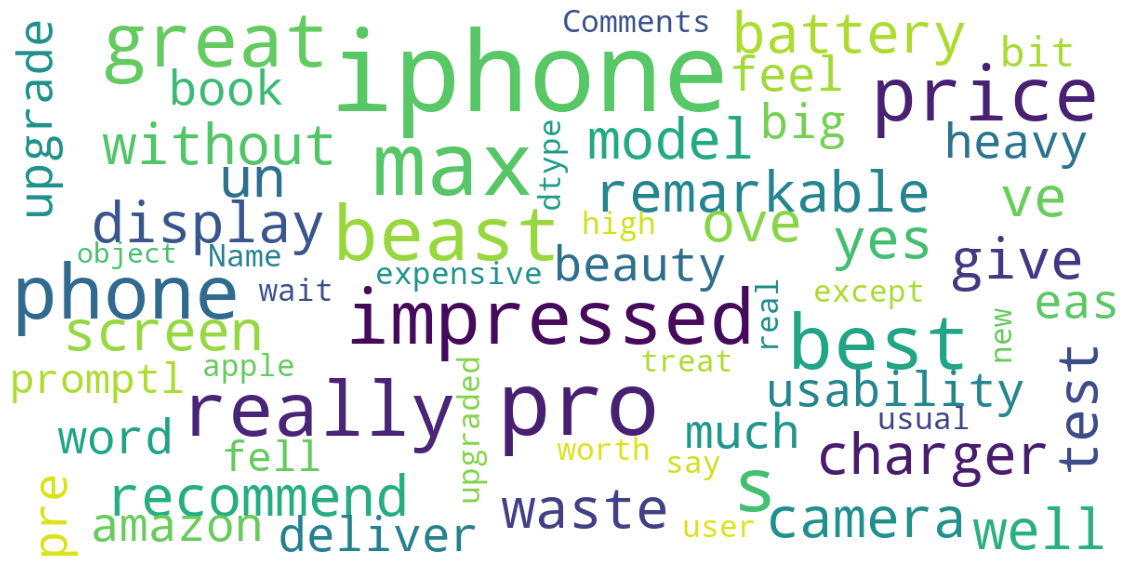

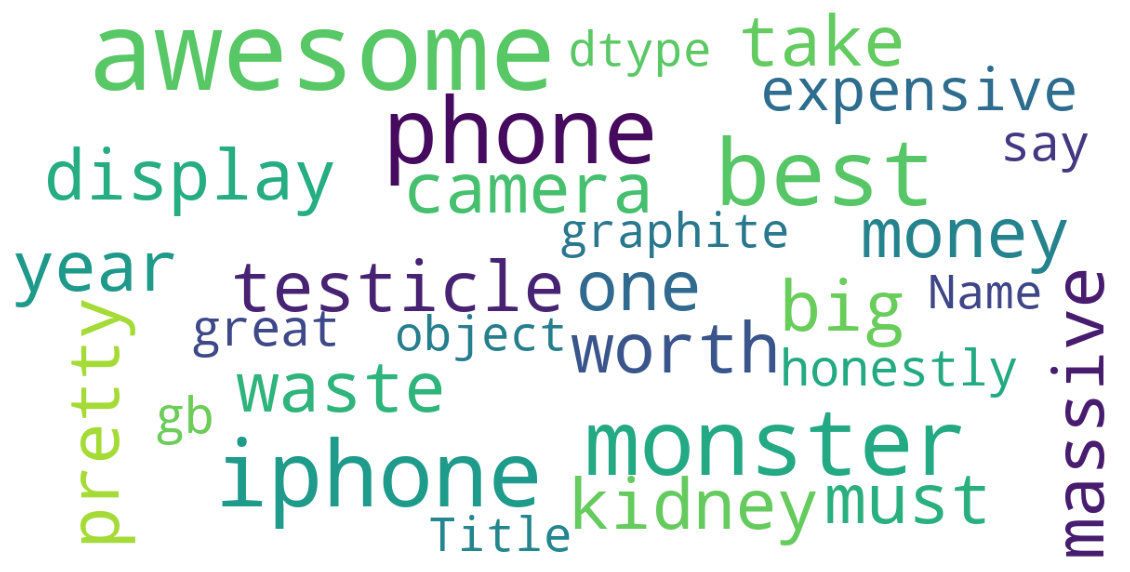

In [28]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)
    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(df["Comments"])
show_wordcloud(df["Title"])


In [29]:

# highest positive sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 5].sort_values("pos", ascending = False)[["Comments", "pos"]].head(10)
# lowest negative sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 5].sort_values("neg", ascending = False)[["Comments", "neg"]].head(10)


,Comments,neg
0,price without charger too.not recommend waste ...,0.353
2,best iphone yes max model give well screen ove...,0.125
1,impressed i’ve test iphones it’s remarkable un...,0.108
4,word beauty upgrade iphone feel big heavy much...,0.083
3,pro great display battery camera usability eas...,0.000
5,pre book iphone pro max amazon deliver promptl...,0.000
6,fell like phone bit expensive really apple say...,0.000
7,real beast treat wait worth upgraded pro max i...,0.000
8,best new user iphone..it’s great impressed..if...,0.000
9,phone beast except price really high usual can...,0.000


In [30]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.head(2)


,Title,Ratings,Comments,Date,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4,word_iphone,Month,Year
0,waste money,1.0,price without charger too.not recommend waste ...,2020-11-09,0.353,0.647,0.000,-0.6007,76,11,0.024218,-0.005668,-0.105436,-0.028329,-0.062305,0.0,11,2020
1,take one kidney testicle worth,5.0,impressed i’ve test iphones it’s remarkable un...,2020-11-17,0.108,0.685,0.207,0.7351,334,49,-0.130658,-0.101888,0.030381,-0.011634,-0.062147,1.0,11,2020


In [31]:
df_recent = df[(df['Year']== 2020) & (df['Month'] != 8)]
df_recent.head(2)

,Title,Ratings,Comments,Date,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4,word_iphone,Month,Year
0,waste money,1.0,price without charger too.not recommend waste ...,2020-11-09,0.353,0.647,0.000,-0.6007,76,11,0.024218,-0.005668,-0.105436,-0.028329,-0.062305,0.0,11,2020
1,take one kidney testicle worth,5.0,impressed i’ve test iphones it’s remarkable un...,2020-11-17,0.108,0.685,0.207,0.7351,334,49,-0.130658,-0.101888,0.030381,-0.011634,-0.062147,1.0,11,2020
